In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from scipy.stats import spearmanr

# Set up default colors
colors=[*mc.TABLEAU_COLORS.values()]

%matplotlib inline

In [2]:
years = [2017, 2018]

In [3]:
i2w = np.load('data/i2w_metoo.npy', allow_pickle=True).item()
w2i = np.load('data/w2i_metoo.npy', allow_pickle=True).item()

# Dataset statistics

# Network statistics

# Power Law

# Ranking

In [4]:
def analyse_rankings(metric, best = 20):
    # Load metric
    scores = np.load('data/{}_metoo.npy'.format(metric), allow_pickle=True).item()
    # Make plot
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    for i, y in enumerate(years):
        sc = pd.Series(scores[y]).sort_values(ascending=False)
        _ = axs[i].set_title('Best nodes for {} in {:d}\'s network'.format(metric, y))
        _ = axs[i].bar(sc.index[:best].map(lambda x: str(i2w[x])), sc.values[:best], color=colors[i])
        _ = axs[i].tick_params(axis='x', labelrotation=60)
    #_ = plt.savefig('images/analysis/words_rank_{}.png'.format(metric), bbox_inches='tight')
    _ = plt.show()
    return scores

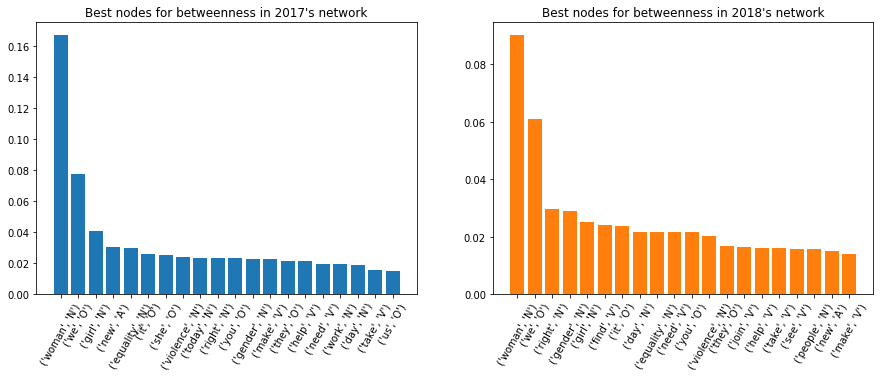

In [5]:
betw = analyse_rankings('betweenness')

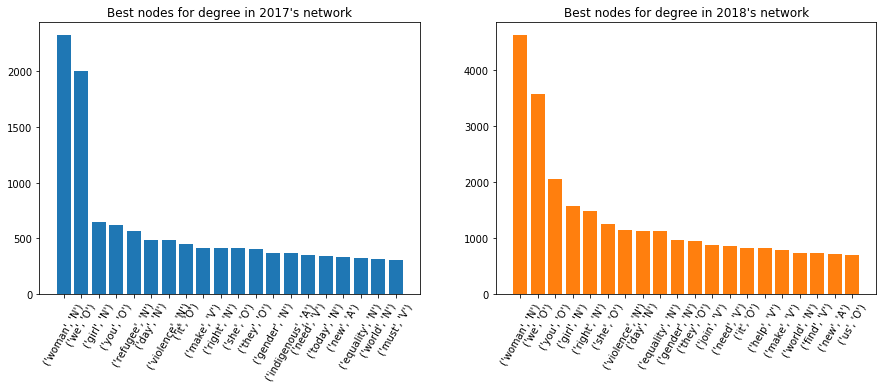

In [6]:
deg = analyse_rankings('degree')

In [7]:
spearmanr(list(betw[2017].values()), deg[2017].values.tolist())

SpearmanrResult(correlation=0.8376630654569004, pvalue=0.0)

In [8]:
spearmanr(list(betw[2018].values()), deg[2018].values.tolist())

SpearmanrResult(correlation=0.8518378793907943, pvalue=0.0)

In [9]:
deg_2017 = pd.DataFrame({'word': deg[2017].index.map(lambda x: str(i2w[x][0])), 
                         'role': deg[2017].index.map(lambda x: str(i2w[x][1])),
                         'centrality' : deg[2017].values.tolist() , 
                         'year' : 2017 
                        })
deg_2017.head()

,word,role,centrality,year
0,-magnitude,N,7,2017
1,earthquake,N,17,2017
2,help,V,291,2017
3,we,O,1998,2017
4,woman,N,2323,2017


In [10]:
deg_2018 = pd.DataFrame({'word': deg[2018].index.map(lambda x: str(i2w[x][0])), 
                         'role': deg[2018].index.map(lambda x: str(i2w[x][1])),
                         'centrality' : deg[2018].values.tolist() , 
                         'year' : 2018 
                        })
deg_2018.head()

,word,role,centrality,year
0,-celebrating,V,5,2018
1,day,N,1133,2018
2,empower,V,342,2018
3,event,N,146,2018
4,start,V,197,2018


In [11]:
words_list = pd.concat([deg_2017, deg_2018])

In [12]:
words_list

,word,role,centrality,year
0,-magnitude,N,7,2017
1,earthquake,N,17,2017
2,help,V,291,2017
3,we,O,1998,2017
4,woman,N,2323,2017
...,...,...,...,...
1888,torch-bearer,N,5,2018
1889,negotiation,N,13,2018
1890,re-build,V,6,2018
1891,unlock,V,4,2018


In [13]:
words_list.to_csv('data/words_list_metoo.csv')